In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#loading dataset
data=pd.read_csv( r"C:\Users\Jiss Mathew\Desktop\Python Programming-ICT\virtual comeptition-2\test_lAUu6dG.csv")

# Exploratory Data Analysis (EDA)

In [3]:
print("Dataset Dimensions are:", data.shape)

Dataset Dimensions are: (367, 12)


In [4]:
#To print statistics of the dataset
print("The statistics of the dataset:", data.describe())

The statistics of the dataset:        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  362.000000        361.000000   
mean       4805.599455        1569.577657  136.132597        342.537396   
std        4910.685399        2334.232099   61.366652         65.156643   
min           0.000000           0.000000   28.000000          6.000000   
25%        2864.000000           0.000000  100.250000        360.000000   
50%        3786.000000        1025.000000  125.000000        360.000000   
75%        5060.000000        2430.500000  158.000000        360.000000   
max       72529.000000       24000.000000  550.000000        480.000000   

       Credit_History  
count      338.000000  
mean         0.825444  
std          0.380150  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


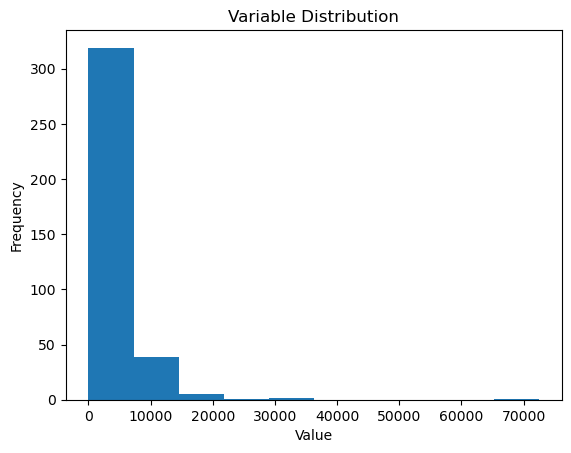

In [5]:
# Visualization
import matplotlib.pyplot as plt
plt.hist(data['ApplicantIncome'])
plt.title('Variable Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Pre-Processing

In [6]:
# Separating target variable from features
X= data.drop('Property_Area', axis=1)
y= data['Property_Area']

In [7]:
#Spliting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
#Preprocessing steps for different types of variables
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())])

In [9]:
# Apply the preprocessing steps to the appropriate columns
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Modeling

In [10]:
#Model Defining
model=Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

In [11]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])